In [3]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

import torchvision

In [5]:
import set_data as sd

# load train set, test set

X_train, Y_train, X_test, Y_test, y_min, y_max, y_mean, y_std = sd.set_data("data/combined_total_data_3")

# print(X_train.shape)
# print(X_train, Y_train)
# print(Y_train[0])

# y_test = Variable(Y_test)
# for i in range(20):
#     print(y_test)

x_train = Variable(X_train)
y_train = Variable(Y_train)


----------normalize--------------
 X_Data:  [[0.4        0.52302632 0.10526316 ... 0.75657895 0.10526316 0.28571429]
 [1.         0.70065789 0.84210526 ... 0.92763158 0.10526316 0.28571429]
 [1.         0.64802632 0.10526316 ... 0.35855263 0.31578947 1.        ]
 ...
 [0.2        0.25986842 0.73684211 ... 0.34868421 0.15789474 0.71428571]
 [0.4        0.89473684 0.57894737 ... 0.10855263 0.26315789 0.28571429]
 [1.         0.01315789 0.36842105 ... 0.11184211 0.42105263 0.85714286]]
[-1.13230866 -1.12507744 -0.98772211 ...  0.50383923  1.50817799
  2.09998707]


In [9]:
# regression model

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(28, 64) #input dim = 28, hidden = 128
        self.drop1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 10)
        self.drop2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(10,5)
        self.drop3 = nn.Dropout(0.1)
        self.fc4 = nn.Linear(5, 1)
        

    def forward(self, x):
        a = F.relu(self.fc1(x))
        a = self.drop1(a)
        a = F.relu(self.fc2(a))
        a = self.drop2(a)
        a = F.relu(self.fc3(a))
        a = self.drop3(a)
        a = self.fc4(a)
        
        return a

In [12]:
# train



loss_graph = []

In [24]:
epochs = 1000
learningrate = 0.01

model = RegressionModel()
model.load_state_dict(torch.load('./lenna_d.pth'))
criterion = nn.SmoothL1Loss(size_average = True) 
optimizer = torch.optim.Adam(model.parameters(), lr=learningrate)

print('\nStart Training...\n')

for epoch in range(epochs+1):
    # forward pass
    pred_y = model(x_train.float())
    

    # compute and print loss
    loss = criterion(pred_y.double(), y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    loss_graph.append(loss.item())
    
    if epoch % 10 == 0:
        print ('epoch [{}/{}], loss {}'.format(epoch, epochs, loss.item())) # or loss item
    


Start Training...

epoch [0/1000], loss 0.13995100773763808
epoch [10/1000], loss 0.1362400060218599
epoch [20/1000], loss 0.13358147174520288
epoch [30/1000], loss 0.13222548755242616
epoch [40/1000], loss 0.13065902637749507
epoch [50/1000], loss 0.1291801018142287
epoch [60/1000], loss 0.1278709227412643
epoch [70/1000], loss 0.12695937392654155
epoch [80/1000], loss 0.1261952611650045
epoch [90/1000], loss 0.1248123437003774
epoch [100/1000], loss 0.1236742959542715
epoch [110/1000], loss 0.12284101533840543
epoch [120/1000], loss 0.12266116312966589
epoch [130/1000], loss 0.1218202143080206
epoch [140/1000], loss 0.1217040526391194
epoch [150/1000], loss 0.12130125612189778
epoch [160/1000], loss 0.12100875280669579
epoch [170/1000], loss 0.12091911800673878
epoch [180/1000], loss 0.1205693170075592
epoch [190/1000], loss 0.12033643079578978
epoch [200/1000], loss 0.12040619647799411
epoch [210/1000], loss 0.12050850258727153
epoch [220/1000], loss 0.12033094555868669
epoch [230/

In [25]:
torch.save(model.state_dict(), "./lenna_d.pth")

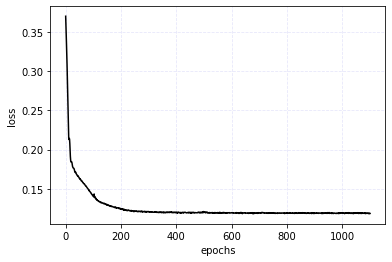

In [31]:
fig = plt.figure()
plt.plot(range(epochs+102), loss_graph, label = 'loss', color = 'black')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid(linestyle = '--', color = 'lavender')
plt.show()

In [32]:
x_test = Variable(X_test)
y_test = Variable(Y_test)

model.eval()
y_pred = model(x_test.float())
after_train = criterion(y_pred.double(), y_test) 
print('Test loss after Training' , after_train.item())

Test loss after Training 0.2493415259671085


In [33]:
x_test = Variable(X_test)
y_test = Variable(Y_test)
print(y_test)
criterion = nn.SmoothL1Loss(size_average = True) 

new_model= RegressionModel()
new_model.load_state_dict(torch.load('./lenna_d.pth'))
    
new_model.eval()

y_pred = new_model(x_test.float())
after_train = criterion(y_pred.double(), y_test) 
print('Test loss after Training' , after_train.item())

tensor([[-0.1933],
        [ 0.5295],
        [-0.2456],
        ...,
        [ 0.5038],
        [ 1.5082],
        [ 2.1000]], dtype=torch.float64)
Test loss after Training 0.2493415259671085


/nfs/home/meowpunch/.local/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [34]:
def denormalize(data, d_min, d_max, d_mean, d_std):
    
    tmp_data = torch.empty([data.shape[0], data.shape[1]])
    
    for i in range(data.shape[0]):
        e = float(data[i])
        
        #tmp_data[i] = (e*d_std + d_mean)
        tmp_data[i] = (e*d_std + d_mean)*(d_max - d_min) + d_min

    return tmp_data

for i in range(20):
    print(y_test[i], y_pred[i])
# print(float(y_pred[0]))
# print(y_test.float())
# print(y_pred[0])

dy_test = denormalize(y_test, y_min, y_max, y_mean, y_std)
dy_pred = denormalize(y_pred, y_min, y_max, y_mean, y_std)

for i in range(20):
    print(dy_test[i], dy_pred[i])
# print(dy_test)
# print(dy_pred)



tensor([-0.1933], dtype=torch.float64) tensor([0.1130], grad_fn=<SelectBackward>)
tensor([0.5295], dtype=torch.float64) tensor([0.7504], grad_fn=<SelectBackward>)
tensor([-0.2456], dtype=torch.float64) tensor([0.1610], grad_fn=<SelectBackward>)
tensor([0.0414], dtype=torch.float64) tensor([0.4066], grad_fn=<SelectBackward>)
tensor([-0.9015], dtype=torch.float64) tensor([-0.4868], grad_fn=<SelectBackward>)
tensor([-0.4572], dtype=torch.float64) tensor([-0.1539], grad_fn=<SelectBackward>)
tensor([-0.1019], dtype=torch.float64) tensor([0.0220], grad_fn=<SelectBackward>)
tensor([1.5011], dtype=torch.float64) tensor([0.7785], grad_fn=<SelectBackward>)
tensor([-0.4985], dtype=torch.float64) tensor([-0.2176], grad_fn=<SelectBackward>)
tensor([0.8036], dtype=torch.float64) tensor([0.9932], grad_fn=<SelectBackward>)
tensor([1.1582], dtype=torch.float64) tensor([1.2911], grad_fn=<SelectBackward>)
tensor([-0.1585], dtype=torch.float64) tensor([-0.2244], grad_fn=<SelectBackward>)
tensor([-0.5299],